# Training a Linear Regression Algorithm
***
This is an exercise in computing a linear regression with a single variable. <br>
I used the linear algebra package 'numpy' to optimize computations and the 'matplotlib' package for visual analysis.

In [1]:
# import required dependencies
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotData import *
from computeCost import *
from gradientDescent import *

Load the dataset from `ex1data1.txt` into the variables X and y. <br>

Some notes on notation:
- superscripts in parentheses denote an example from the data (i.e. a single subject of a dataset).
- subscripts denote a feature of the data (i.e. a value that was measured relative to the subject).

In [2]:
# Load data from external file
data = np.loadtxt("ex1data1.txt", dtype=float, delimiter=',')
x = data[:,0, None]
y = data[:,1, None]
m = len(y)

It's a good idea to visualize the data before going any further. Then we can decide what analysis to perform. Since there are two quantitative variables, the data can be visualized using a scatterplot. <br>
Note: Most problems have more than two variables and cannot be vizualized with simple 2D plots.

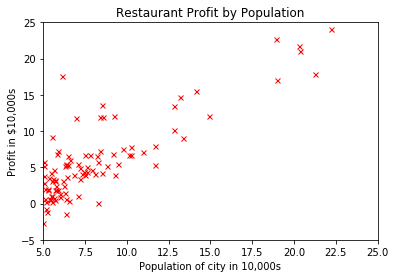

In [3]:
# Plot initial data
plotData(x, y)
plt.xlim(xmin=5, xmax=25)
plt.ylim(ymin=-5, ymax=25)
plt.title("Restaurant Profit by Population")
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

It looks like there is a linear relationship in the data so we want to find a linear model that fits the data. The general formula for a linear model is $$ f_{\theta}(x) = \theta_{0} + \theta_{1}x. $$ So we want the algorithm to find a function that fits this formula and describes the behavior of the data. <br>

Note: The parameter $\theta_{0}$ is often called the bias parameter in statistics.

The function described above can be vectorized by concatenating a column of ones onto x. Below I concatenate a bias vector of ones to the data and initialize the regression parameter vector $\theta$. <br>

In [4]:
# Prepare data for cost function
X = np.concatenate((np.ones((m, 1)), data[:,0, None]), axis=-1)
theta = np.zeros((2, 1))

These are the hyperparameters that determine how many iterations to train the algorithm and the learning rate of the training step. These will come up later.

In [5]:
# Calibrate gradient descent formula
iterations = 1500
alpha = 0.01

The goal now is to train the algorithm to find the parameters $\theta$ that minimize a cost function. The regression is trained with the mean squared error (MSE) function $$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\left(f_{\theta}(X^{(i)}) - y^{(i)}\right)^{2}. $$ We can see that as $\theta$ changes the cost goes up or down. We want the value of $\theta$ that makes $J$ as small as possible.

In [6]:
# Compute cost with theta = [0, 0]
J = computeCost(X, y, theta)
print("Cost computed for theta = [0 ; 0] is:")
print(J)

Cost computed for theta = [0 ; 0] is:
32.072733877455676


In [7]:
# Compute cost with theta = [-1, 2]
J = computeCost(X, y, np.matrix('-1 ; 2'))
print("Cost computed for theta = [-1 ; 2] is:")
print(J)

Cost computed for theta = [-1 ; 2] is:
54.24245508201238


So how do we get the algorithm to decide on which parameters to choose? We're going to use derivatives to calculate the gradient of the cost function in a process called gradient descent. The formula will be as follows: $$ \theta_{j} := \theta_{j} + \alpha\frac{\partial J}{\partial \theta_{j}}. $$ In particular we want the derivative of $J$ with respect to $\theta$. So $$ \frac{\partial J}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m}\left(f_{\theta}(X^{(i)}) - y^{(i)}\right)^{2}X_{j}^{(i)}. $$ This will produce a different $\theta$ that is theoretically closer to the optimized value that we want. Here we're going to use the hyperparameters from earlier. The number of iterations will determine how many times gradient descent is run and the parameter $\alpha$ will determine how large of a change each iteration has on $\theta$.

In [8]:
# Calculate theta with gradient descent formula
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Calculated theta from gradient descent:")
print(theta)

Calculated theta from gradient descent:
[[-3.63029144]
 [ 1.16636235]]


The resulting model is $$ f_{\theta}(X) = \theta_{0} + \theta_{1} X_{1}^{(i)}. $$
Note: $X_{0}^{(i)} = 1$ for $1 \leq i \leq m$ and is only used to simplify the code. Therefore, I did not include it in the above model. <br>
Now if we plot $f_{\theta}$ on the scatterplot of the data, we can see that it looks like a good fit.

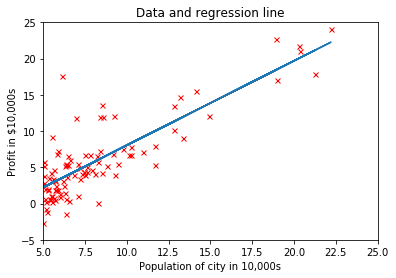

In [9]:
# Plot data with regression line
plotData(x, y)
plt.plot(x, np.dot(X, theta))
plt.xlim(xmin=5, xmax=25)
plt.ylim(ymin=-5, ymax=25)
plt.title("Data and regression line")
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of city in 10,000s")
plt.show()

It's now possible to make predictions using the regression line.

In [10]:
#Predictions
predict1 = np.dot([1, 3.5], theta)
predict2 = np.dot([1, 7], theta)

In [11]:
print("For a population of 35,000, we predict a profit of:")
print(predict1 * 10000)
print("For a population of 70,000, we predict a profit of:")
print(predict2 * 10000)

For a population of 35,000, we predict a profit of:
[4519.7678677]
For a population of 70,000, we predict a profit of:
[45342.45012945]


So that's basically the end of this demonstration of linear regression. However, we can go more in-depth by analyzing some parts of the training process. Sometimes linear regression can diverge and give a wrong answer. In that case it would be necessary to debug the algorithm. The `gradientDescent` function that was used here not only calculates the gradient but it also computes the loss of the cost function using the current $\theta$ and stores it in `J_history`. If we plot `J_history`, we can better see how the training algorithm performed. 

Text(0, 0.5, 'Loss')

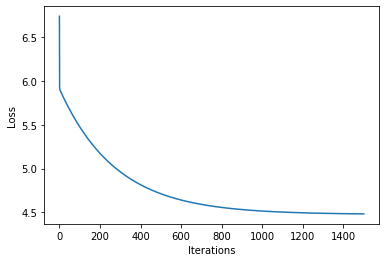

In [12]:
n = np.linspace(0, iterations, len(J_history))
plt.plot(n, J_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")

The first few iterations reduced the loss very quickly and then we start to get diminishing returns. So it takes many iterations to minimize the loss but eventually the training process will become inefficient (i.e. computational cost is greater than the potential loss decrease). A common problem is choosing the correct learning rate for gradient descent. If the loss increases over iterations than it may be that the learning rate was set too high. Conversely, if the loss decreases very slowly than the learning rate was probably set too low. Choosing a good learning rate a priori is difficult and usually requires some experimentation.

Since $\theta$ is two dimensional, we can also visualize the loss in 3D. Below I create a surface plot based on the values of $\theta_{0}$ and $\theta_{1}$ around the area that I want to visualize.

In [13]:
# Grid of feature values (theta_0, theta_1) to calculate J
# Generate two vectors of linearly spaced values in the area to visualize
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to (100,1) matrix
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.concatenate((theta0_vals[i, None], theta1_vals[j, None]))
        J_vals[i, j] = computeCost(X, y, t)
        
# Prepare mesh plot of theta_0, theta_1, and J_vals
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

Now by plotting these 3D values we can better see the environment that the gradient descent algorithm is working on. 

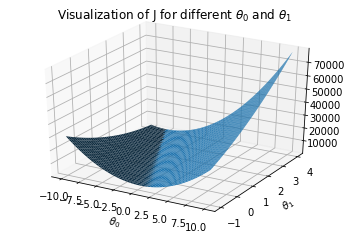

In [14]:
# Plot J_vals as surface plot
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(theta0_vals, theta1_vals, J_vals, linewidth=0)
plt.title(r"Visualization of J for different $\theta_0$ and $\theta_1$")
plt.ylabel(r"$\theta_1$")
plt.xlabel(r"$\theta_0$")
plt.show()

The above plot is a bowl shape that curves upward on all sides. The gradient descent algorithm starts somewhere in this bowl and then naturally moves downward towards the lowest point. However, this is only a local view and does not represent the entire surface. It may be that there are other areas of the surface that we can't see that have even lower points. On the other hand, it's also possible that this plot contains the absolute minimum value.

Plots in 3D can be hard to look at and aren't very reliable when trying to see exact values. However, a contour plot can still show depth while providing a more reliable 2D view.

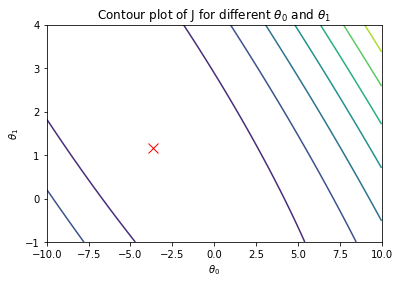

In [15]:
# Plot J_vals as contour plot
plt.contour(theta0_vals, theta1_vals, J_vals)
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.title(r"Contour plot of J for different $\theta_0$ and $\theta_1$")
plt.ylabel(r"$\theta_1$")
plt.xlabel(r"$\theta_0$")
plt.show()

The colour of the contours shows which direction the surface is going (cooler colours are smaller values and hotter colours are bigger values) and the space between the contours provides a sense of how fast the surface is increasing or decreasing. The red mark on the plot is the value of $\theta$ that was found by the regression algorithm.